<a href="https://colab.research.google.com/github/Nibir-Atik/HeartDiseasePredection/blob/main/labfinal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Dataset Shape: (297, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Columns:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'f

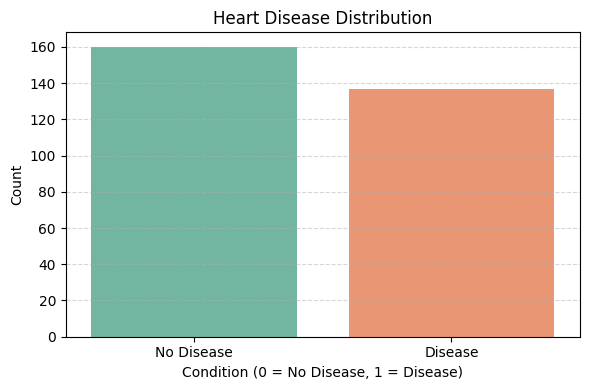


Accuracy:              0.88333
Precision (PPV):        0.95652
Recall (Sensitivity):   0.78571
F1 Score:               0.86275
ROC AUC:                0.93917
Specificity (TNR):      0.96875
False Positive Rate:    0.03125
False Negative Rate:    0.21429
Balanced Accuracy:      0.87723
Matthews Corr Coef:     0.77415


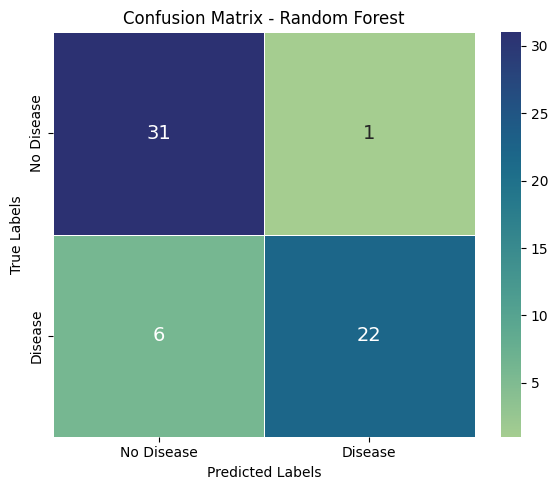

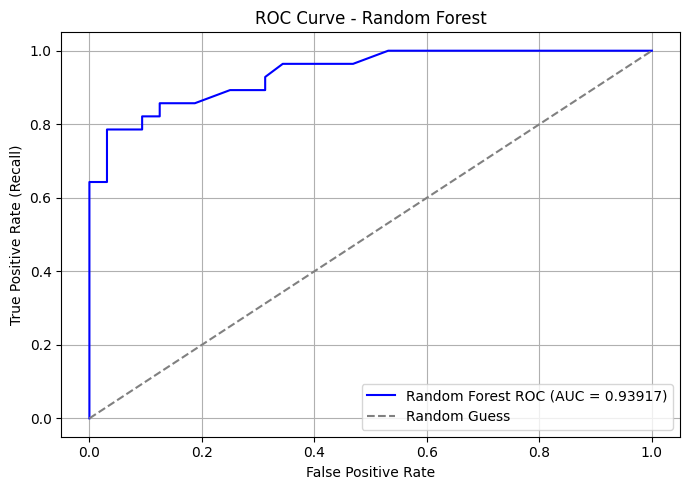

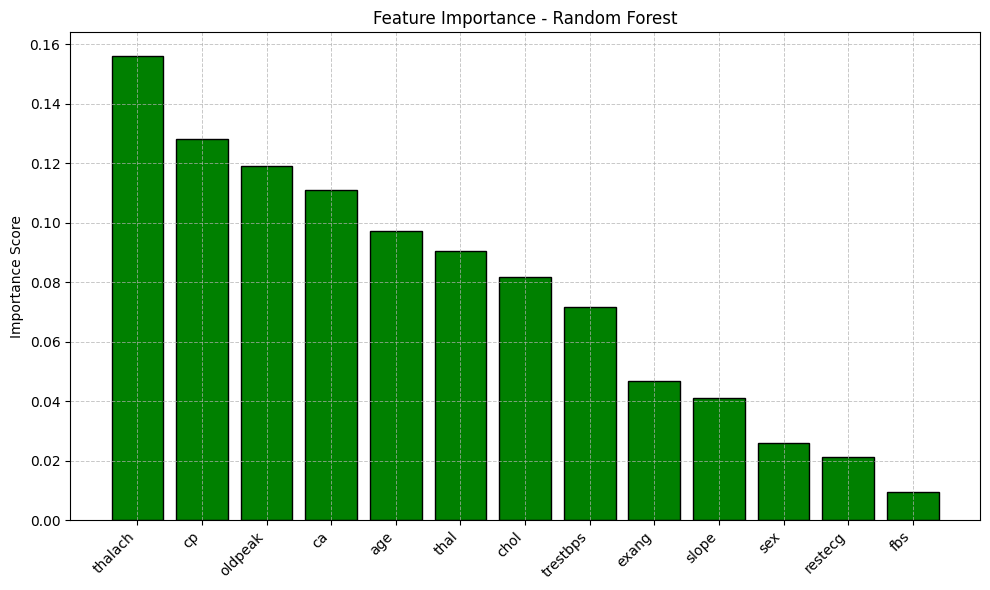

In [1]:
# Heart Disease Prediction

# Load and Explore Dataset

import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

#Loading the dataset

# Load the training and testing datasets
df = pd.read_csv('/content/drive/MyDrive/Machine learning lab/heart_cleveland_upload.csv')


# Basic Inspection
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumns:\n", df.columns.tolist())

# Target column: 'condition' (0 = No Heart Disease, 1 = Heart Disease)

# ----------------------
# Data Preprocessing
# ----------------------

# Features and target
X = df.drop(columns=['condition'])
y = df['condition']

# Plot class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='condition', hue='condition', palette='Set2', legend=False)
plt.title('Heart Disease Distribution')
plt.xlabel('Condition (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ----------------------
# Train-Test Split
# ----------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------
# Train Random Forest
# ----------------------
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,       # use 100 trees for stability
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# ----------------------
# Evaluation Metrics
# ----------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print metrics
print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (PPV):        {precision:.5f}")
print(f"Recall (Sensitivity):   {recall:.5f}")
print(f"F1 Score:               {f1:.5f}")
print(f"ROC AUC:                {roc_auc:.5f}")
print(f"Specificity (TNR):      {specificity:.5f}")
print(f"False Positive Rate:    {fpr:.5f}")
print(f"False Negative Rate:    {fnr:.5f}")
print(f"Balanced Accuracy:      {balanced_acc:.5f}")
print(f"Matthews Corr Coef:     {mcc:.5f}")

# ----------------------
# Confusion Matrix Plot
# ----------------------
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

fig, ax = plt.subplots(figsize=(6, 5))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 14}, linewidths=0.5, linecolor='white')

ax.set_title("Confusion Matrix - Random Forest")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(['No Disease', 'Disease'])
ax.set_yticklabels(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

# ----------------------
# ROC Curve
# ----------------------
from sklearn.metrics import roc_curve

y_prob_val = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_val)
roc_auc = roc_auc_score(y_test, y_prob_val)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Random Forest ROC (AUC = {roc_auc:.5f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------
# Feature Importance
# ----------------------
import numpy as np

importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(features)), importances[indices], align='center', color='green', edgecolor='black')
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()